## 심리성향 예측 AI 경진대회

|변수|설명|
|-----|----|
|index|번호|
|Q_A (a~t)|비식별화를 위해 일부 질문은 Secret 처리(1=Disagree, 2=Slightly disagree, 3=Neutral, 4=Slightly agree, 5=Agree.)|
|Q_E (a~t)| 해당 문항에 답하는 시간|
|Qa|Secret|
|Qb|The biggest difference between most criminals and other people is that the criminals are stupid enough to get caught.(대부분의 범죄자와 다른 사람들의 가장 큰 차이점은 범죄자들이 잡힐 만큼 어리석다는 것입니다.)|
|Qc|Anyone who completely trusts anyone else is asking for trouble.(다른 사람을 완전히 신뢰하는 사람은 문제를 요구하는 것입니다.)|
|Qd|Secret|
|Qe|P.T. Barnum was wrong when he said that there's a sucker born every minute.(PT Barnum은 매분마다 태어난다고 말한 것은 틀렸습니다.)|
|Qf|There is no excuse for lying to someone else.(남에게 거짓말을 하는 것은 변명의 여지가 없다)|
|Qg|Secret|
|Qh|Most people forget more easily the death of their parents than the loss of their property.(대부분의 사람들은 재산을 잃는 것보다 부모의 죽음을 더 쉽게 잊는다)|
|Qi|Secret|
|Qj|It is safest to assume that all people have a vicious streak and it will come out when they are given a chance.(모든 사람에게 악의가 있고 기회가 있을 때 나타날 것이라고 가정하는 것이 가장 안전합니다.)|
|Qk|All in all, it is better to be humble and honest than to be important and dishonest.(대체로 중요하고 부정직한 것보다 겸손하고 부정직한 것이 더 낫습니다.)|
|Ql|Secret|
|Qm|It is hard to get ahead without cutting corners here and there.(여기 저기 모퉁이를 자르지 않고는 앞서가기 어렵다)|
|Qn|Secret|
|Qo|The best way to handle people is to tell them what they want to hear.(사람들을 다루는 가장 좋은 방법은 그들이 듣고 싶은 말을 하는 것이다)|
|Qp|Secret|
|Qq|Most people are basically good and kind.(대부분의 사람들은 기본적으로 착하고 친절합니다.)|
|Qr|One should take action only when sure it is morally right.(One should take action only when sure it is morally right.)|
|Qs|It is wise to flatter important people.(중요한 사람에게 아첨하는 것이 현명합니다.)|
|Qt|Secret|
|age_group|연령|
|education|교육 수준 (1=Less than high school, 2=High school, 3=University degree, 4=Graduate degree, 0=무응답)|
|engnat|모국어가 영어 (1=Yes, 2=No, 0=무응답)|
|familysize|형제자매 수|
|gender|성별 (Male, Female)|
|hand|필기하는 손 (1=Right, 2=Left, 3=Both, 0=무응답)|
|married|혼인 상태 (1=Never married, 2=Currently married, 3=Previously married, 0=Other)|
|race|인종 (Asian, Arab, Black, Indigenous Australian, Native American, White, Other)|
|religion|종교 (Agnostic, Atheist, Buddhist, Christian_Catholic, Christian_Mormon, Christian_Protestant, Christian_Other, Hindu, Jewish, Muslim, Sikh, Other)|
|tp__(01~07)|items were rated "I see myself as:" _____ such that( 나는 나를 이렇게 생각한다)|
|tp01|Extraverted, enthusiastic.(외향적, 열정적)|
|tp02|Critical, quarrelsome.(크리티컬, 다툼)|
|tp03|Dependable, self-disciplined.(신뢰할 수 있는, 자제력 있는)|
|tp04|Anxious, easily upset.(불안하고 화를 쉽게 낸다)|
|tp05|Open to new experiences, complex.(오픈 마인드, 복잡함)|
|tp06|Reserved, quiet.(예약된, 조용한)|
|tp07|Sympathetic, warm.(동정심, 따뜻함)|
|tp08|Disorganized, careless.(무질서하고 부주의한)|
|tp09|Calm, emotionally stable.(차분하고 정서적으로 안정된)|
|tp10|Conventional, uncreative.(기존의, 창의적이지 않은)|
|urban|유년기의 거주 구역(1=Rural (country side), 2=Suburban, 3=Urban (town, city), 0=무응답)|
|wr_(01~13)|실존하는 해당 단어의 정의을 앎 (1=Yes, 0=No)|
|wf_(01~03)|허구인 단어의 정의를 앎 (1=Yes, 0=No)|
|voted (타겟)|지난 해 국가 선거 투표 여부 (1=Yes, 2=No)|

1. 질문의 수준과 질문에 대답하는 시간을 통해 응답자의 성향 파악 가능


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='New Gulim')

#### 데이터 로드

In [2]:
train = pd.read_csv('train.csv')
test = pd. read_csv('test_x.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [3]:
train.head(5)

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,...,0,1,0,1,1,0,1,0,1,1
1,1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,...,1,1,0,1,1,0,1,0,1,1
2,2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,...,1,1,0,1,1,1,1,0,1,1
3,3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,...,0,0,0,0,1,0,1,0,1,1
4,4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,...,1,1,1,1,1,0,1,1,1,1


#### 결측값 확인

In [4]:
train.isnull().sum()

index    0
QaA      0
QaE      0
QbA      0
QbE      0
        ..
wr_09    0
wr_10    0
wr_11    0
wr_12    0
wr_13    0
Length: 78, dtype: int64

In [5]:
test.isnull().sum()

index    0
QaA      0
QaE      0
QbA      0
QbE      0
        ..
wr_09    0
wr_10    0
wr_11    0
wr_12    0
wr_13    0
Length: 77, dtype: int64

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45532 entries, 0 to 45531
Data columns (total 78 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       45532 non-null  int64  
 1   QaA         45532 non-null  float64
 2   QaE         45532 non-null  int64  
 3   QbA         45532 non-null  float64
 4   QbE         45532 non-null  int64  
 5   QcA         45532 non-null  float64
 6   QcE         45532 non-null  int64  
 7   QdA         45532 non-null  float64
 8   QdE         45532 non-null  int64  
 9   QeA         45532 non-null  float64
 10  QeE         45532 non-null  int64  
 11  QfA         45532 non-null  float64
 12  QfE         45532 non-null  int64  
 13  QgA         45532 non-null  float64
 14  QgE         45532 non-null  int64  
 15  QhA         45532 non-null  float64
 16  QhE         45532 non-null  int64  
 17  QiA         45532 non-null  float64
 18  QiE         45532 non-null  int64  
 19  QjA         45532 non-nul

#### 연령별 분포

In [7]:
cnt=train.groupby(['age_group'],as_index=False).count()

,age_group,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,+70s,235,235,235,235,235,235,235,235,235,...,235,235,235,235,235,235,235,235,235,235
1,10s,14215,14215,14215,14215,14215,14215,14215,14215,14215,...,14215,14215,14215,14215,14215,14215,14215,14215,14215,14215
2,20s,14112,14112,14112,14112,14112,14112,14112,14112,14112,...,14112,14112,14112,14112,14112,14112,14112,14112,14112,14112
3,30s,7836,7836,7836,7836,7836,7836,7836,7836,7836,...,7836,7836,7836,7836,7836,7836,7836,7836,7836,7836
4,40s,5051,5051,5051,5051,5051,5051,5051,5051,5051,...,5051,5051,5051,5051,5051,5051,5051,5051,5051,5051
5,50s,2889,2889,2889,2889,2889,2889,2889,2889,2889,...,2889,2889,2889,2889,2889,2889,2889,2889,2889,2889
6,60s,1194,1194,1194,1194,1194,1194,1194,1194,1194,...,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194


Text(0.5, 1.0, '연령 비율')

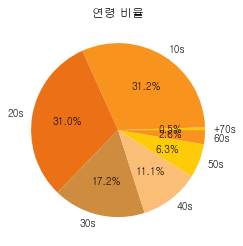

In [5]:
#연령대 별 비율

colors=['#FFCA08','#F8931D','#EC7016','#CE8D3E','#FBBE77']
plt.pie(cnt['index'], labels=cnt['age_group'],autopct='%.1f%%', colors=colors)
plt.title('연령 비율')

#10대, 20대가 가장 많고 60,70대가 가장 비율이 낮다

In [32]:
age_group = round(train.groupby(['age_group'], as_index = False).mean())
age_group

,age_group,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,+70s,22764.0,2.0,1179.0,2.0,1920.0,3.0,1614.0,2.0,1486.0,...,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
1,10s,22989.0,2.0,776.0,3.0,1962.0,4.0,1365.0,2.0,1572.0,...,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
2,20s,22673.0,2.0,923.0,3.0,2384.0,4.0,1530.0,2.0,1457.0,...,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
3,30s,22647.0,2.0,880.0,3.0,2450.0,4.0,1666.0,2.0,1447.0,...,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
4,40s,22688.0,2.0,926.0,3.0,1943.0,4.0,1372.0,2.0,1448.0,...,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
5,50s,22345.0,2.0,1837.0,2.0,2057.0,3.0,1451.0,2.0,1440.0,...,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
6,60s,23314.0,3.0,1534.0,2.0,2297.0,3.0,1696.0,2.0,1509.0,...,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0


In [6]:
x = np.array(age_group['age_group'])
x

array(['+70s', '10s', '20s', '30s', '40s', '50s', '60s'], dtype=object)

In [7]:
age_QA =age_group.iloc[:,2:42:2]
age_QA.index = x
age_QA

,QaA,QbA,QcA,QdA,QeA,QfA,QgA,QhA,QiA,QjA,QkA,QlA,QmA,QnA,QoA,QpA,QqA,QrA,QsA,QtA
+70s,2.0,2.0,3.0,2.0,3.0,3.0,2.0,2.0,4.0,3.0,4.0,4.0,3.0,3.0,3.0,2.0,4.0,3.0,3.0,3.0
10s,2.0,3.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,4.0,4.0,4.0,4.0,2.0,3.0,3.0,2.0,3.0,4.0,4.0
20s,2.0,3.0,4.0,2.0,2.0,2.0,3.0,2.0,3.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0
30s,2.0,3.0,4.0,2.0,2.0,2.0,3.0,2.0,3.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
40s,2.0,3.0,4.0,2.0,2.0,2.0,3.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
50s,2.0,2.0,3.0,2.0,2.0,3.0,3.0,2.0,4.0,3.0,4.0,4.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0
60s,3.0,2.0,3.0,2.0,3.0,3.0,3.0,2.0,4.0,3.0,4.0,4.0,3.0,3.0,3.0,2.0,4.0,3.0,3.0,2.0


In [8]:
age_QE = age_group.iloc[:,3:42:2]
age_QE.index = x
age_QE 

#초단위?

,QaE,QbE,QcE,QdE,QeE,QfE,QgE,QhE,QiE,QjE,QkE,QlE,QmE,QnE,QoE,QpE,QqE,QrE,QsE,QtE
+70s,1179.0,1920.0,1614.0,1486.0,1835.0,1396.0,1524.0,2304.0,2559.0,1937.0,1625.0,1707.0,1451.0,1157.0,1598.0,1510.0,1208.0,1856.0,1268.0,1789.0
10s,776.0,1962.0,1365.0,1572.0,1724.0,1816.0,1277.0,9744.0,5004.0,2631.0,1901.0,2142.0,2692.0,857.0,1336.0,1964.0,1287.0,1505.0,1040.0,2967.0
20s,923.0,2384.0,1530.0,1457.0,2096.0,1405.0,1230.0,2094.0,4543.0,2328.0,2222.0,7365.0,2064.0,977.0,1543.0,1489.0,954.0,4175.0,1221.0,1823.0
30s,880.0,2450.0,1666.0,1447.0,1806.0,1945.0,1358.0,2538.0,3167.0,3611.0,2356.0,2387.0,1507.0,977.0,1349.0,1525.0,1408.0,1925.0,1244.0,1749.0
40s,926.0,1943.0,1372.0,1448.0,2118.0,3487.0,1227.0,2183.0,2661.0,2035.0,1655.0,1591.0,1524.0,1052.0,1570.0,1427.0,973.0,1746.0,1152.0,2553.0
50s,1837.0,2057.0,1451.0,1440.0,1760.0,1339.0,1400.0,2263.0,2654.0,1982.0,1769.0,1683.0,1463.0,1123.0,1381.0,1444.0,1128.0,1844.0,1206.0,1621.0
60s,1534.0,2297.0,1696.0,1509.0,1697.0,1314.0,1459.0,2241.0,2917.0,1928.0,1791.0,3317.0,1581.0,1054.0,1455.0,1475.0,1101.0,2113.0,1375.0,1994.0


#### 연령대에 따른 답변 평균과 답변 응답 시간 평균
세대에 따른 가치관 차이가 있을 듯
답변에 대한 점수에 따라 가치관 차이가 나올 듯

답변 응답시간에 따라 세대별 혼동하는 가치관이 드러날것이라 생각

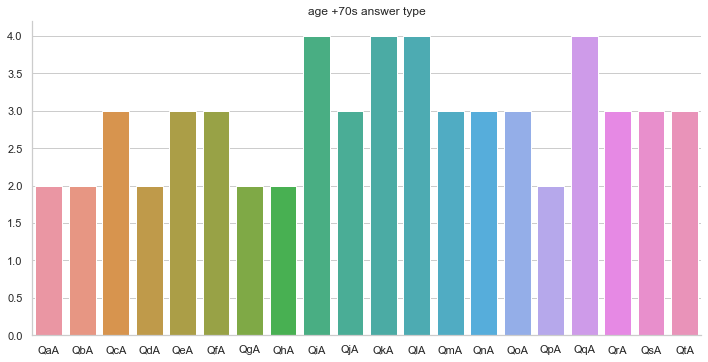

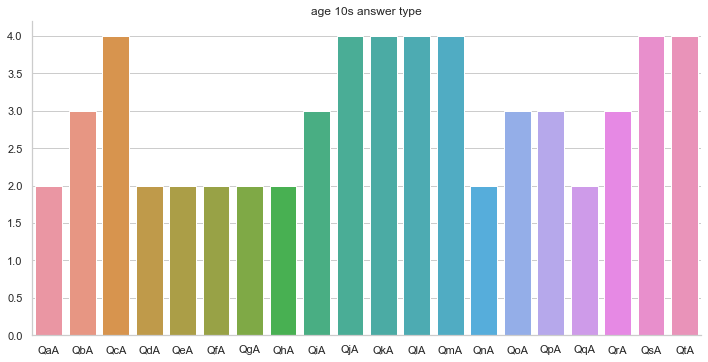

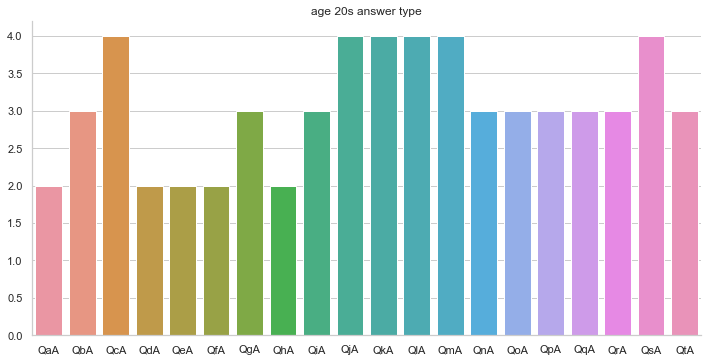

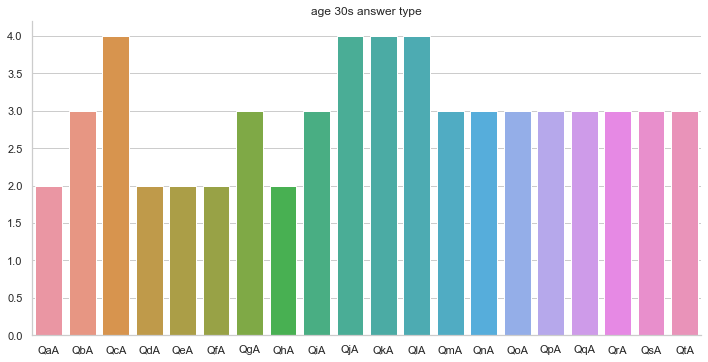

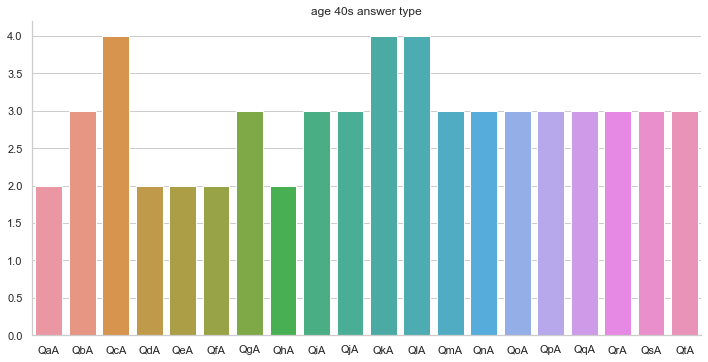

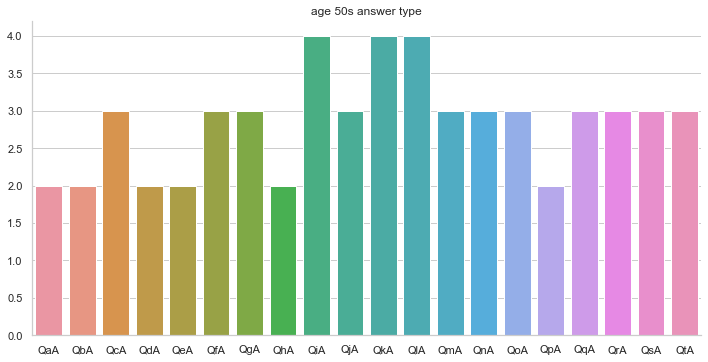

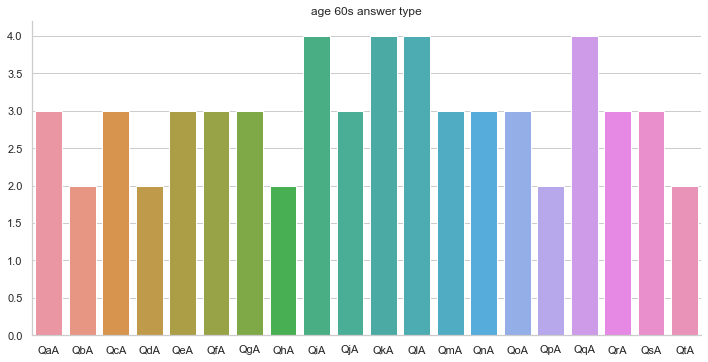

In [9]:
for i in range(len(x)):
    sns.set_theme(style='whitegrid')
    sns.catplot(data=age_QA[i:i+1], kind='bar',ci=None,aspect=16/8)
    plt.title("age "+ x[i]+" answer type")

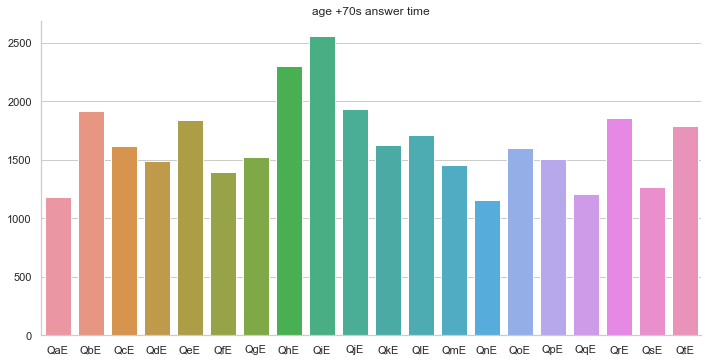

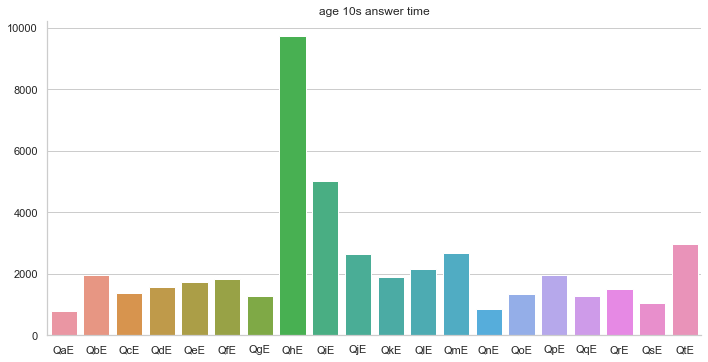

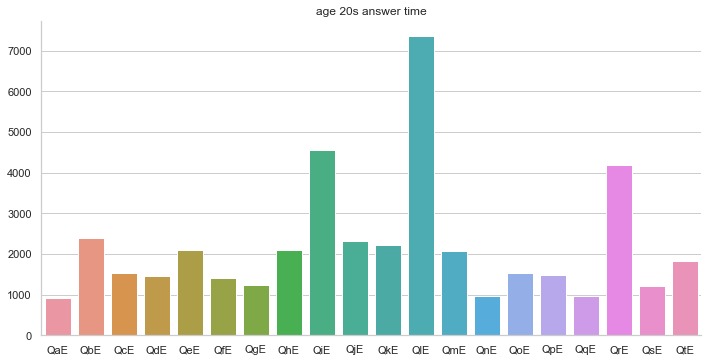

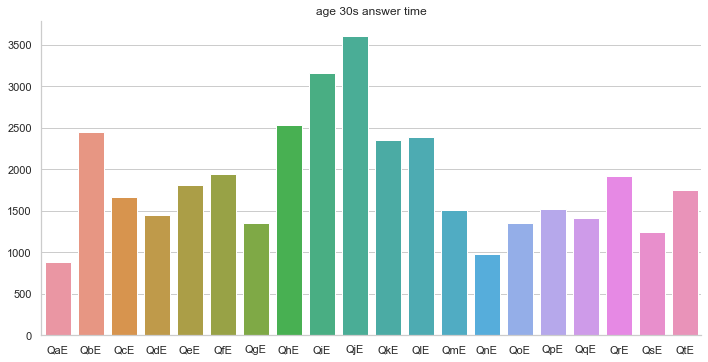

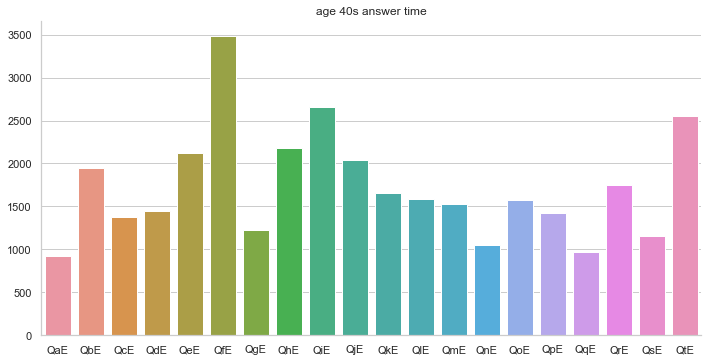

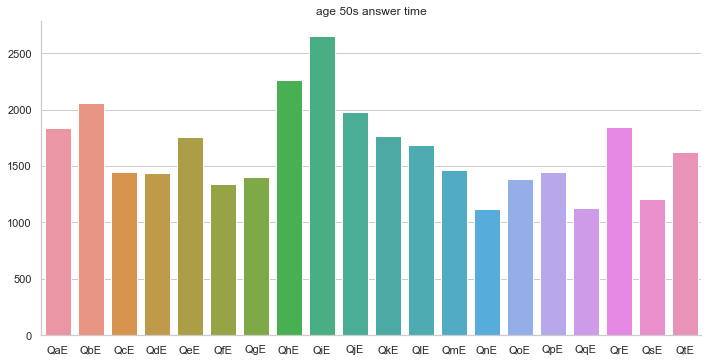

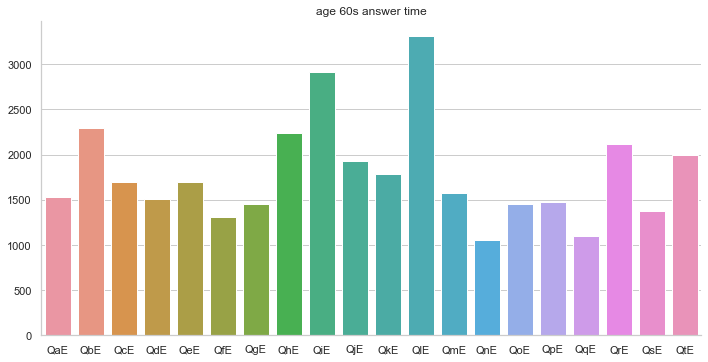

In [10]:
for i in range(len(x)):
    sns.set_theme(style='whitegrid')
    sns.catplot(data=age_QE[i:i+1], kind='bar',ci=None,aspect=16/8)
    plt.title("age "+ x[i]+" answer time")

전체 추이
연령이 높아질 수록 응답 시간이 길어지는 것을 확인 가능
전체적으로 5점 (x)
i,j,k,l 부분의 점수가 대체로 높은 경향

+70

답변 : i,k,l,q가 높다
시간 : i

10
답변 : c,i,j,k,l,q,s,t가 높다
시간 : h

20
답변 : c,i,j.k,l,q,s
시간 : l

30
답변 : c,i,k,l
시간 : j,i

40
답변 : c,k,l,가 높다
시간 : f

50
답변 : i,k,l,가 높다
시간 : ih

60
답변 : c,k,l,가 높다
시간 :il


In [67]:
#wr_(01~13)	실존하는 해당 단어의 정의을 앎 (1=Yes, 0=No)
#wf_(01~03)	허구인 단어의 정의를 앎 (1=Yes, 0=No)

#비율로 보는게 더 좋을 것이라 생각

#연령에 따른 전체 카운트
cnt.iloc[:,-13:]
cnt_all = cnt.iloc[:,0:2]
cnt_all

#연령, wr들
age_wr= pd.concat([train['age_group'], train.iloc[:,-13:]], axis = 1)
age_wr

#age_wr/cnt_all = 1인거는 소수로 나오고 0인거는 0
#소수로 나온것만 연령대로 다 더하면 연령대에 따라 wr을 아는지 모르는지 평균이 나옴

,age_group,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,30s,0,1,0,0,1,0,1,1,0,1,0,1,1
1,20s,0,1,0,1,1,0,1,1,0,1,0,1,1
2,30s,1,1,0,1,1,0,1,1,1,1,0,1,1
3,20s,0,1,0,0,0,0,0,1,0,1,0,1,1
4,20s,1,1,0,1,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,10s,1,1,0,1,1,0,1,1,1,1,0,1,1
45528,30s,1,1,1,1,1,0,1,1,1,1,0,1,1
45529,10s,1,1,0,1,1,0,1,1,0,1,0,1,1
45530,40s,1,1,0,1,1,0,1,1,1,1,0,1,1


age_10 = age_wr['age_group'] == '+70s'
age_10 = age_wr[age_10]
(age_10.iloc[:,1:]/len(age_10)).sum()

#/len(age_00)).sum()
#age_10

In [92]:
age_00 = pd.DataFrame()

for i in x:
    del age_10
    age_10 = age_wr['age_group'] == i
    age_10 = age_wr[age_10]
    age_10 = (age_10.iloc[:,1:]/len(age_10)).sum()
    age_00 = pd.concat([age_00,age_10],axis = 1)
    
age_00.columns = x
age_00 # 연령에 따라 실존하는 단어의 정의를 아는 사람의 평균 비율 (어떤 대답에 따른 비율인지는 (x)

,+70s,10s,20s,30s,40s,50s,60s
wr_01,0.842553,0.612452,0.710247,0.764165,0.792318,0.822084,0.856784
wr_02,0.965957,0.918537,0.921060,0.948954,0.961196,0.972655,0.988275
wr_03,0.536170,0.120858,0.171627,0.240301,0.323104,0.399792,0.484925
wr_04,0.931915,0.832360,0.862103,0.885656,0.905167,0.930080,0.953099
wr_05,0.970213,0.843968,0.890944,0.922537,0.949713,0.968847,0.972362
wr_06,0.421277,0.255083,0.352820,0.360771,0.366660,0.370024,0.424623
wr_07,0.936170,0.931481,0.932327,0.941041,0.949713,0.969540,0.971524
wr_08,0.961702,0.967640,0.970876,0.976263,0.977628,0.978539,0.979062
wr_09,0.336170,0.125572,0.181477,0.257019,0.292021,0.313603,0.347571
wr_10,0.965957,0.930707,0.941964,0.954441,0.966145,0.968847,0.979899


In [12]:
tra = train.groupby(['age_group'], as_index = False).mean()
tra['voted']

0    1.263830
1    1.837214
2    1.469671
3    1.411179
4    1.357949
5    1.329872
6    1.271357
Name: voted, dtype: float64

In [9]:
train

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,...,0,1,0,1,1,0,1,0,1,1
1,1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,...,1,1,0,1,1,0,1,0,1,1
2,2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,...,1,1,0,1,1,1,1,0,1,1
3,3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,...,0,0,0,0,1,0,1,0,1,1
4,4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,...,1,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,45527,2.0,1050,5.0,619,4.0,328,1.0,285,1.0,...,1,1,0,1,1,1,1,0,1,1
45528,45528,2.0,581,3.0,1353,4.0,1164,1.0,798,3.0,...,1,1,0,1,1,1,1,0,1,1
45529,45529,4.0,593,1.0,857,1.0,1047,4.0,1515,5.0,...,1,1,0,1,1,0,1,0,1,1
45530,45530,1.0,747,3.0,1331,4.0,892,2.0,1281,1.0,...,1,1,0,1,1,1,1,0,1,1


In [21]:
train['age_group']

0        30s
1        20s
2        30s
3        20s
4        20s
        ... 
45527    10s
45528    30s
45529    10s
45530    40s
45531    20s
Name: age_group, Length: 45532, dtype: object

In [57]:
cnt

,age_group,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,+70s,235,235,235,235,235,235,235,235,235,...,235,235,235,235,235,235,235,235,235,235
1,10s,14215,14215,14215,14215,14215,14215,14215,14215,14215,...,14215,14215,14215,14215,14215,14215,14215,14215,14215,14215
2,20s,14112,14112,14112,14112,14112,14112,14112,14112,14112,...,14112,14112,14112,14112,14112,14112,14112,14112,14112,14112
3,30s,7836,7836,7836,7836,7836,7836,7836,7836,7836,...,7836,7836,7836,7836,7836,7836,7836,7836,7836,7836
4,40s,5051,5051,5051,5051,5051,5051,5051,5051,5051,...,5051,5051,5051,5051,5051,5051,5051,5051,5051,5051
5,50s,2889,2889,2889,2889,2889,2889,2889,2889,2889,...,2889,2889,2889,2889,2889,2889,2889,2889,2889,2889
6,60s,1194,1194,1194,1194,1194,1194,1194,1194,1194,...,1194,1194,1194,1194,1194,1194,1194,1194,1194,1194


In [3]:
age_g = [[],[],[],[],[],[],[]] #10,20,30,40,50,60 순서대로 투표 여부가 들어감
for i in range(len(train)):
    for j in range(1,7):
        if train['age_group'][i] == '%d0s'%j:
            age_g[j-1].append(train['voted'][i])
            
    if train['age_group'][i] == '+70s': #70 투표 여부
        age_g[-1].append(train['voted'][i])

In [72]:
len(age_g[0])

14215

In [22]:
age_G = pd.DataFrame(age_g)
age_G = age_G.T
age_G.columns = ['10s','20s','30s','40s','50s','60s','+70']

In [23]:
age_G

,10s,20s,30s,40s,50s,60s,+70
0,1.0,2.0,2.0,2.0,1.0,1.0,1.0
1,2.0,1.0,1.0,1.0,2.0,2.0,1.0
2,2.0,1.0,1.0,1.0,2.0,1.0,2.0
3,2.0,1.0,1.0,1.0,1.0,1.0,1.0
4,2.0,1.0,2.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...
14210,2.0,NaN,NaN,NaN,NaN,NaN,NaN
14211,2.0,NaN,NaN,NaN,NaN,NaN,NaN
14212,2.0,NaN,NaN,NaN,NaN,NaN,NaN
14213,2.0,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
import scipy.stats

In [12]:
ttest_all = [[],[],[],[],[],[],[]]
for i in range(len(age_g)):
    for j in range(len(age_g)):
        ttest = scipy.stats.ttest_ind(age_g[i], age_g[j],equal_var=False)
        ttest_all[i].append(ttest)

ttest_all

[[Ttest_indResult(statistic=0.0, pvalue=1.0),
  Ttest_indResult(statistic=70.42180415508251, pvalue=0.0),
  Ttest_indResult(statistic=66.95372003414161, pvalue=0.0),
  Ttest_indResult(statistic=64.56697306692763, pvalue=0.0),
  Ttest_indResult(statistic=54.66641627091302, pvalue=0.0),
  Ttest_indResult(statistic=42.73531340343027, pvalue=3.77725910176429e-252),
  Ttest_indResult(statistic=19.788310504526635, pvalue=2.698571092172826e-52)],
 [Ttest_indResult(statistic=-70.42180415508251, pvalue=0.0),
  Ttest_indResult(statistic=0.0, pvalue=1.0),
  Ttest_indResult(statistic=8.394407809213385, pvalue=5.060928895369807e-17),
  Ttest_indResult(statistic=14.05776703829185, pvalue=1.9795183646215406e-44),
  Ttest_indResult(statistic=14.404293574376009, pvalue=5.546348281254257e-46),
  Ttest_indResult(statistic=14.644353365696961, pvalue=2.0652825785460528e-45),
  Ttest_indResult(statistic=7.07001147159264, pvalue=1.6217330497576406e-11)],
 [Ttest_indResult(statistic=-66.95372003414161, pvalue

In [13]:
t_test_all = pd.DataFrame(ttest_all)
t_test_all #0.05기준

#H0: 연령별 투표율의 차이가 없을 것이다
#H0: 연령별 투표율의 차이가 있을 것이다

#60대와 70대의 t-test가 유의하지 않다고 나옴
#60-70 간의 결과는 유의하지 않을 것이라 예상되어 빼도 될듯?
#이게 맞나???

,0,1,2,3,4,5,6
0,"(0.0, 1.0)","(70.42180415508251, 0.0)","(66.95372003414161, 0.0)","(64.56697306692763, 0.0)","(54.66641627091302, 0.0)","(42.73531340343027, 3.77725910176429e-252)","(19.788310504526635, 2.698571092172826e-52)"
1,"(-70.42180415508251, 0.0)","(0.0, 1.0)","(8.394407809213385, 5.060928895369807e-17)","(14.05776703829185, 1.9795183646215406e-44)","(14.404293574376009, 5.546348281254257e-46)","(14.644353365696961, 2.0652825785460528e-45)","(7.07001147159264, 1.6217330497576406e-11)"
2,"(-66.95372003414161, 0.0)","(-8.394407809213385, 5.060928895369807e-17)","(0.0, 1.0)","(6.0895090957977605, 1.1704800909788302e-09)","(7.844000087202097, 5.228154383008445e-15)","(9.971134967187957, 8.708635461587702e-23)","(5.021896540108423, 9.696957302204217e-07)"
3,"(-64.56697306692763, 0.0)","(-14.05776703829185, 1.9795183646215406e-44)","(-6.0895090957977605, 1.1704800909788302e-09)","(0.0, 1.0)","(2.5414268838655243, 0.011064615722730884)","(5.95779683008749, 3.037988122407148e-09)","(3.180853847297521, 0.0016463546294552462)"
4,"(-54.66641627091302, 0.0)","(-14.404293574376009, 5.546348281254257e-46)","(-7.844000087202097, 5.228154383008445e-15)","(-2.5414268838655243, 0.011064615722730884)","(0.0, 1.0)","(3.7593338092566144, 0.000174533651011163)","(2.193427078123518, 0.029101909463910253)"
5,"(-42.73531340343027, 3.77725910176429e-252)","(-14.644353365696961, 2.0652825785460528e-45)","(-9.971134967187957, 8.708635461587702e-23)","(-5.95779683008749, 3.037988122407148e-09)","(-3.7593338092566144, 0.000174533651011163)","(0.0, 1.0)","(0.238531850406404, 0.8116148235459724)"
6,"(-19.788310504526635, 2.698571092172826e-52)","(-7.07001147159264, 1.6217330497576406e-11)","(-5.021896540108423, 9.696957302204217e-07)","(-3.180853847297521, 0.0016463546294552462)","(-2.193427078123518, 0.029101909463910253)","(-0.238531850406404, 0.8116148235459724)","(0.0, 1.0)"
